In [3]:
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import os

np.seterr(all="ignore")

from threeML import *
silence_warnings()
%matplotlib inline
set_threeML_style()

In [4]:
# reading polarization data from AstroSat CZTI and creating polarization plugin
trigger_time = 254120293.0

czti_polarization_ts = TimeSeriesBuilder.from_pol_polarization(name='czti_pol', polevents='/home/polpy/polpy_test/polpy/fitting/GRB180120A/cztipol_GRB180120A.pevt',
                                              polrsp='/home/polpy/polpy_test/polpy/fitting/GRB180120A/CZTI_POLRSP_EMIN_110_EMAX_1000 _GRB180120A.prsp', specrsp=None,
                                               trigger_time=trigger_time)

czti_polarization_ts.set_background_interval("-150.--50.","50.-150.")
czti_polarization_ts.set_active_time_interval('0-24.0')
czti_data = czti_polarization_ts.to_polarizationlike()

KeyError: "Extension 'MATRIX' not found."

In [ ]:
#effective area correction
#czti_data.fix_effective_area_correction(2.0)
czti_data.use_effective_area_correction(0.1,300.0)

Using effective area correction


In [ ]:
# reading spectrum data from Fermi GBM and creating spectrum plugin
gbm_cat = FermiGBMBurstCatalog()
gbm_cat.query_sources('GRB180120207')
grb_info = gbm_cat.get_detector_information()["GRB180120207"]
gbm_detectors = grb_info["detectors"]
source_interval = grb_info["source"]["fluence"]
background_interval = grb_info["background"]["full"]
best_fit_model = grb_info["best fit model"]["fluence"]

In [ ]:
print(source_interval,"\n", background_interval, "\n", gbm_detectors, "\n", type(gbm_detectors))

1.344000-30.272000 
 -18.710000--2.670000,52.460000-68.790000 
 ['n9' 'na' 'nb' 'b1'] 
 <class 'numpy.ndarray'>


In [ ]:
#gbm_detectors = ['n0', 'n1', 'n2', 'b0'] #can add 'n3', 'n5'

In [ ]:
dload = download_GBM_trigger_data("GRB180120207", detectors=gbm_detectors)

Loading PHAII Spectra:   0%|          | 0/2120 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:46:15 INFO      Auto-determined polynomial order: 0                                ]8;id=432239;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=199218;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_09 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:46:29 INFO      None 0-order polynomial fit with the mle method                               ]8;id=280617;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=449443;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n9_bkg.h5                                         ]8;id=506357;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=458885;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n9_bkg.h5                                         ]8;id=539141;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=361987;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:46:30 INFO      Successfully restored fit from n9_bkg.h5                              ]8;id=536785;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=318126;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_NAI_09
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

         INFO      Interval set to 1.344-30.272 for n9                                   ]8;id=536893;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=671876;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=885725;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=258675;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=538163;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=300189;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=479705;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=115556;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=227087;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=259495;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

19:46:38 INFO      Now using 120 bins                                                          ]8;id=902199;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=973672;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

Loading PHAII Spectra:   0%|          | 0/2120 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:46:44 INFO      Auto-determined polynomial order: 0                                ]8;id=652241;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=930675;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_10 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:47:10 INFO      None 0-order polynomial fit with the mle method                               ]8;id=145287;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=636848;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to na_bkg.h5                                         ]8;id=238777;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=398450;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to na_bkg.h5                                         ]8;id=289770;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=281838;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:47:11 INFO      Successfully restored fit from na_bkg.h5                              ]8;id=624615;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=250209;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_NAI_10
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

         INFO      Interval set to 1.344-30.272 for na                                   ]8;id=278241;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=966717;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

19:47:12 INFO      Auto-probed noise models:                                                    ]8;id=875206;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=246623;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=899532;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=263930;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=691943;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=666776;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 6-124                                    ]8;id=510565;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=219628;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=754639;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=563571;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

Loading PHAII Spectra:   0%|          | 0/2120 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:47:15 INFO      Auto-determined polynomial order: 0                                ]8;id=884927;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=629820;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_11 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:47:32 INFO      None 0-order polynomial fit with the mle method                               ]8;id=586722;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=297226;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to nb_bkg.h5                                         ]8;id=447263;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=984734;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to nb_bkg.h5                                         ]8;id=756406;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=296769;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:47:33 INFO      Successfully restored fit from nb_bkg.h5                              ]8;id=574883;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=45275;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_NAI_11
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

         INFO      Interval set to 1.344-30.272 for nb                                   ]8;id=593847;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=642477;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

19:47:34 INFO      Auto-probed noise models:                                                    ]8;id=514741;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=821277;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=467224;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=859900;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=273854;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=959311;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=276303;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=550490;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=797466;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=648601;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

Loading PHAII Spectra:   0%|          | 0/2120 [00:00<?, ?it/s]

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:47:36 INFO      Auto-determined polynomial order: 0                                ]8;id=310126;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=643376;file:///home/polpy/threeML/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_BGO_01 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:47:53 INFO      None 0-order polynomial fit with the mle method                               ]8;id=340052;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=467491;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to b1_bkg.h5                                         ]8;id=445646;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=120898;file:///home/polpy/threeML/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b1_bkg.h5                                         ]8;id=66135;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=570074;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:47:54 INFO      Successfully restored fit from b1_bkg.h5                              ]8;id=392255;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=960523;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
GBM_BGO_01
128
128
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 1

19:47:55 INFO      Interval set to 1.344-30.272 for b1                                   ]8;id=703931;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=535473;file:///home/polpy/threeML/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

19:47:56 INFO      Auto-probed noise models:                                                    ]8;id=697524;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=189641;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=163582;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=65150;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=553274;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=745850;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 250-30000 translates to channels 4-119                                ]8;id=18131;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=856121;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 116 bins                                                          ]8;id=968074;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=287687;file:///home/polpy/threeML/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

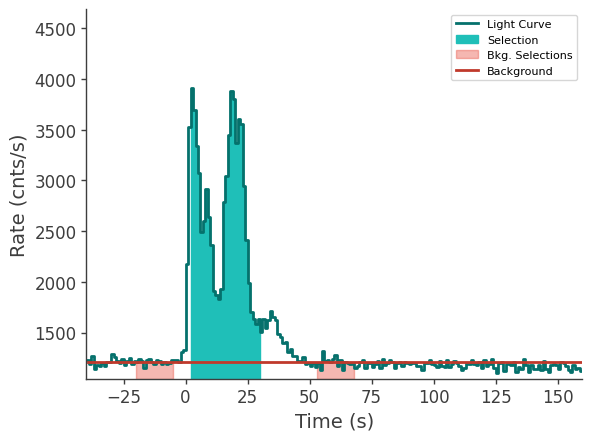

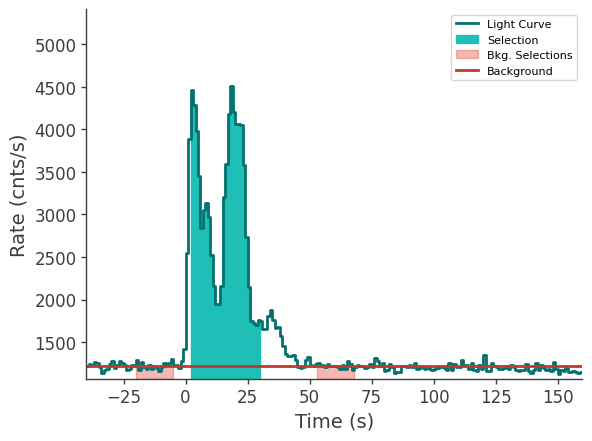

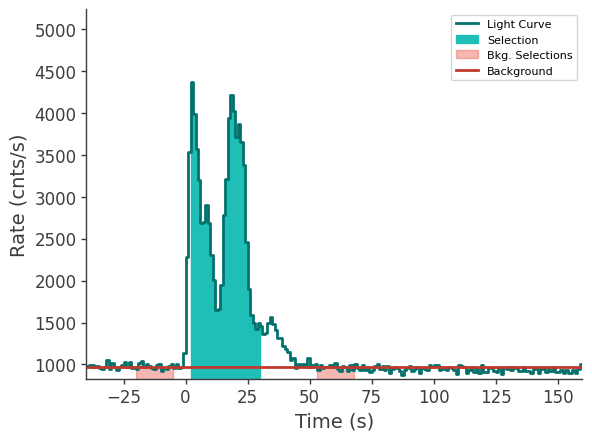

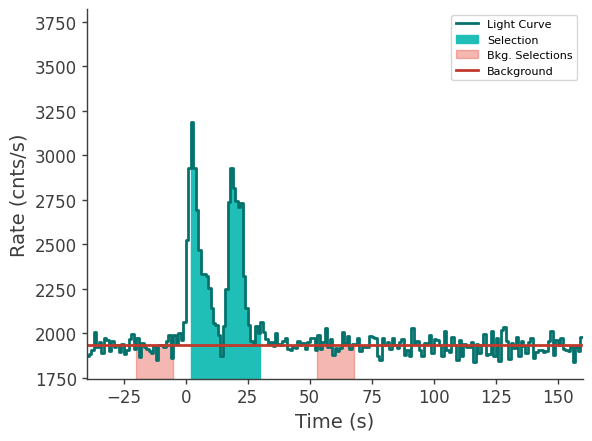

In [ ]:
fluence_plugins = []
time_series = {}
#print(best_fit_model, "\n", source_interval, "\n", model.display())
for det in gbm_detectors:

    ts_cspec = TimeSeriesBuilder.from_gbm_cspec_or_ctime(det, cspec_or_ctime_file=dload[det]["cspec"], rsp_file=dload[det]["rsp"])

    ts_cspec.set_background_interval(*background_interval.split(","))
    ts_cspec.save_background(f"{det}_bkg.h5", overwrite=True)

    ts_tte = TimeSeriesBuilder.from_gbm_tte(
        det,
        tte_file=dload[det]["tte"],
        rsp_file=dload[det]["rsp"],
        restore_background=f"{det}_bkg.h5",
    )

    time_series[det] = ts_tte

    ts_tte.set_active_time_interval(source_interval)

    ts_tte.view_lightcurve(-40, 160)

    fluence_plugin = ts_tte.to_spectrumlike()

    if det.startswith("b"):

        fluence_plugin.set_active_measurements("250-30000")

    else:

        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fluence_plugins.append(fluence_plugin)

In [ ]:
#setting up spectrum model
band = Band()

band.xp.prior = Log_normal(mu=np.log(147),sigma=np.log(100))
band.xp.bounds = (None, None)

band.K.bounds = (1E-10, None)
band.K.prior = Log_uniform_prior(lower_bound=1E-5, upper_bound=1E2)

band.alpha.bounds = (-1.5, 1.0)
band.alpha.prior = Truncated_gaussian(mu=-0.29, sigma=0.5, lower_bound=-1.5, upper_bound=1.0)

band.beta.bounds = (None, -1.5)
band.beta.prior = Truncated_gaussian(mu=-2.8,sigma=0.6, lower_bound=-7, upper_bound=-1.5)

#settting up polarization model
lp = LinearPolarization(60,47)
lp.angle.set_uninformative_prior(Uniform_prior)
lp.degree.prior = Uniform_prior(lower_bound=0.1, upper_bound=100.0)
lp.degree.value=60.
lp.angle.value=16.91

#adding both component and defining the point source
sc =SpectralComponent('synch', band, lp)
ps = PointSource('GRB180120A',0,0, components = [sc])

combined_model = Model(ps)
datalist = DataList(*fluence_plugins,czti_data)

In [ ]:
# Setting up sampler and running bayes

bayes = BayesianAnalysis(combined_model,datalist)
bayes.set_sampler("multinest")
# wrapped = [0] * len(combined_model.free_parameters)
# wrapped[3] = 1
bayes.sampler.setup(n_live_points=400)#,
                        #    resume = False,
                        #    importance_nested_sampling=False,
                        #    verbose=True,
                        #    wrapped_params=wrapped,
                        #    chain_name='chains/synch_p2')
bayes.sample()

19:47:57 INFO      sampler set to multinest                                                ]8;id=806220;file:///home/polpy/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=663169;file:///home/polpy/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 1000
 dimensionality =    7
 *****************************************************


In [ ]:
bayes.results.write_to("AstroSat_CZTI_polarization_results_GRB180120A.fits", overwrite=True)
bayes.restore_median_fit()

In [ ]:
fig = display_spectrum_model_counts(bayes, step=False)

In [ ]:
fig = display_spectrum_model_counts(bayes, min_rate=20)

In [ ]:
#display everthing in bayes.results
bayes.results.display()

In [ ]:
#plot_spectra(bayes.results)

In [ ]:
cornerplot = bayes.results.corner_plot()

In [ ]:
a = bayes.raw_samples
np.shape(a)
deg = a[:,5]
plt.hist(deg)
degrot = np.copy(deg)
degrot[deg > 97.64493707965887] -= 180
plt.hist(degrot)
print(np.mean(degrot), np.std(degrot))

In [ ]:
modualtioncurve = czti_data.display(show_model=True)